In [54]:
#Территория развития плёночной фотографии. Паблик "пленКа"

In [1]:
import vk

In [2]:
token = ""
session = vk.Session(access_token=token)
vk_api = vk.API(session) 

In [3]:
personal_token = ""
session = vk.Session(access_token=personal_token) 
vk_personal_api = vk.API(session) 

In [4]:
def get_members(groupid, fields=('sex', 'bdate', 'city', 'country', 'domain')):
    first = vk_api.groups.getMembers(group_id=groupid, fields=fields, v=5.92)  # Первое выполнение метода
    data = first["items"]  # Присваиваем переменной первую тысячу id'шников
    count = first["count"] // 1000  # Присваиваем переменной количество тысяч участников
    # С каждым проходом цикла смещение offset увеличивается на тысячу
    # и еще тысяча id'шников добавляется к нашему списку.
    for i in range(1, count+1):  
        data = data + vk_api.groups.getMembers(group_id=groupid, fields=fields, v=5.92, offset=i*1000)["items"]
    return data

In [5]:
members = get_members("plenka_predlozhka")

In [6]:
len (members)

36601

In [7]:
def save_members_to_file(filename, members):
    with open(filename, 'w', encoding='utf-8') as f:
        for member in members:
            _id = member["id"] # находим айди участника
            first_name = member["first_name"] # находим имя учатника
            last_name = member["last_name"] # находим фамилию учатника
            
            sex = member["sex"] # находим пол учатника (1 или 2)
            if int(sex) == 1:  # если пол это 1 
                sex = "F"  # обозначем женский пол как F
            elif int(sex) == 2:  # если пол это 2 
                sex = "M" # обозначем мужской пол как F
            else:  # если есть другой какой-то пол
                sex = "-"  # скорее всего нет, поэтому ставим прочерк
                
            bdate = member.get('bdate', "-")   # находим день рождения учатника
            if len(bdate.split(".")) == 3:  # нам нужен только год, если он есть
                bdate = bdate.split(".")[-1]  # то сохраняем год
            else:  # если год не указан, то возраст участника мы не узнаем
                bdate = "-"  # поэтому прочерк
                
            city = member.get('city', {}).get("title", "-")  # находим город участника
            country = member.get('country', {}).get("title", "-")  # находим страну участника
            f.write(f"{_id},\t{first_name}\t{last_name}\t{sex}\t{bdate}\t{city}\t{country}\n")  # сохраняем информацию в файл

In [28]:
save_members_to_file ("plenka_predlozhka_members.tsv", members)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
import pandas as pd

df = pd.read_csv("plenka_predlozhka_members.tsv", sep="\t", names=["id", "name", "surname", "sex", "birth", "city", "country"])

In [11]:
city_count = df['city'].value_counts().drop('-') # считаем города и удаляем отсутствие города в табличке: "-"
city_count = city_count[:30] # первые 30 городов
print(city_count)

Moscow                     2640
Saint Petersburg           1119
Kyiv                        754
Yekaterinburg               493
Krasnodar                   428
Minsk                       322
Rostov-on-Don               266
Chelyabinsk                 256
Kazan                       252
Kharkiv                     218
Odessa                      205
Novosibirsk                 196
Nizhny Novgorod             190
Vladivostok                 174
Lviv                        163
Almaty                      163
Volgograd                   149
Samara                      143
Dnipropetrovsk (Dnipro)     141
Ufa                         140
Krasnoyarsk                 124
Perm                        123
Saratov                     123
Voronezh                    122
Khabarovsk                  116
Los Angeles                 114
New York City               113
Tyumen                      102
Omsk                         90
Barnaul                      88
Name: city, dtype: int64


In [12]:
sex_count = df['sex'].value_counts().drop('-') # считаем города и удаляем отсутствие города в табличке: "-"
print(sex_count)

F    31680
M     4841
Name: sex, dtype: int64


In [13]:
birth_count = df['birth'].value_counts().drop('-') # считаем города и удаляем отсутствие города в табличке: "-"
birth_count = birth_count[:30] # первые 30 городов
print(birth_count)

1999    1122
1998    1105
2000    1024
1997     984
1996     810
2001     717
1995     574
1994     443
2002     429
1993     340
1992     228
1990     211
2003     207
1991     171
1988     108
1989     106
2004     104
1987      80
1985      61
1986      54
2005      46
2006      46
1980      38
1982      37
1905      37
1902      34
1984      34
1983      33
1979      26
1981      24
Name: birth, dtype: int64


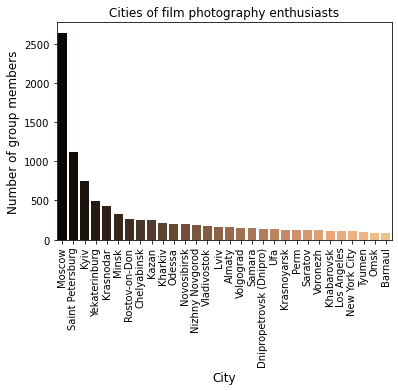

In [14]:
city_count.plot.bar()
sns.barplot(city_count.index, city_count.values, palette='copper') # рисуем график, выбираем цвет
plt.title('Cities of film photography enthusiasts')
plt.ylabel('Number of group members', fontsize=12)
plt.xlabel('City', fontsize=12)
plt.xticks(rotation=90) # разворачиваем подписи под городами на 90 градусов
plt.show() # показываем изображение

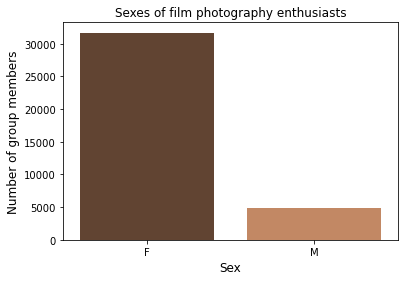

In [15]:
sns.barplot(sex_count.index, sex_count.values, palette='copper') # рисуем график, выбираем цвет
plt.title('Sexes of film photography enthusiasts')
plt.ylabel('Number of group members', fontsize=12)
plt.xlabel('Sex', fontsize=12)
plt.show() # показываем изображение

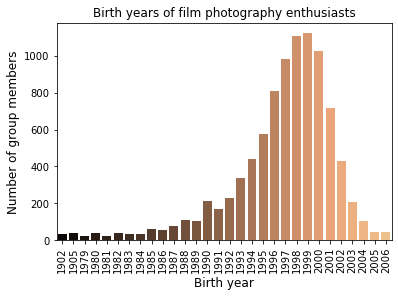

In [56]:
sns.barplot(birth_count.index, birth_count.values, palette='copper') # рисуем график, выбираем цвет
plt.title('Birth years of film photography enthusiasts')
plt.ylabel('Number of group members', fontsize=12)
plt.xlabel('Birth year', fontsize=12)
plt.xticks(rotation=90) # разворачиваем подписи под городами на 90 градусов
plt.show() # показываем изображение

In [17]:
new_df = df[df['sex'].ne('-')] # оставлем тех, кто указал свой пол
new_df['birth'] = pd.to_numeric(new_df['birth'], errors='coerce') # оставлем тех, кто указал свой возраст

<ipython-input-17-79f7398bdecb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['birth'] = pd.to_numeric(new_df['birth'], errors='coerce') # оставлем тех, кто указал свой возраст


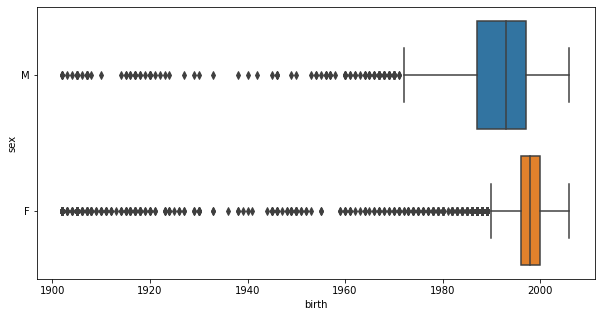

In [18]:
plt.figure(figsize=(10,5)) # размер графика
sns.boxplot(x="birth", y="sex", data=new_df) # строим график
plt.show()

In [19]:
def get_posts(owner_id):
    first = vk_api.wall.get(domain=owner_id, count=100, filter="owner", v=5.124)
    data = first["items"]  # Присваиваем переменной первую тысячу id'шников
    count = first["count"] // 100  # Присваиваем переменной количество тысяч участников
    # С каждым проходом цикла смещение offset увеличивается на тысячу
    # и еще тысяча id'шников добавляется к нашему списку.
    for i in range(1, count+1):  
        data += vk_api.wall.get(domain=owner_id, v=5.124, filter="owner", count=100, offset=i*100)["items"]
    return [i['text'] for i in data]

In [20]:
posts = get_posts('plenka_predlozhka')

In [21]:
len (posts)

50

In [22]:
from datetime import datetime

In [23]:
def get_posts(owner_id):
    first = vk_api.wall.get(domain=owner_id, count=100, filter="owner", v=5.124)
    data = first["items"]  # Присваиваем переменной первую тысячу id'шников
    count = first["count"] // 100  # Присваиваем переменной количество тысяч участников
    # С каждым проходом цикла смещение offset увеличивается на тысячу
    # и еще тысяча id'шников добавляется к нашему списку.
    for i in range(1, count+1):  
        data += vk_api.wall.get(domain=owner_id, v=5.124, filter="owner", count=100, offset=i*100)["items"]
    return data

In [24]:
posts = get_posts('plenka_predlozhka')

In [25]:
for i in posts:
    print(i['text']) #тексты

    print('likes:', i['likes']['count']) # количество лайков
    print('reposts:', i['reposts']['count']) # количество репостов
    print('comments:', i['comments']['count']) # количество комментариев

    date = datetime.fromtimestamp(i['date'])
    print(date.year)

    print("==========")

ПРАВИЛА ПРЕДЛОЖКИ! 

Придерживайтесь стилистики:  

Camera: 
Film: 
instagram.com/ ... 

Инстаграм должен быть прописан ссылкой, так вас будет удобнее находить. 

Посты, предложенные в обход формату публиковаться не будут — давайте уважать чужое время. Спасибо.
likes: 0
reposts: 0
comments: 0
2020
Camera: Зенит-19
Film: Ilford pan 100
Inst: https://www.instagram.com/privet_norton/
likes: 1
reposts: 0
comments: 0
2020
Camera: ФЭД-5
Film: Kodak Portra 400VC
instagram.com/leeroy.photo
likes: 3
reposts: 0
comments: 0
2020
Camera: Zenit 122 
Film: Kodak ColorPlus 200 
instagram.com/alikfilm
likes: 5
reposts: 0
comments: 0
2020
Разбираемся, почему, несмотря на все производственные сложности, большие кинематографисты и начинающие режиссеры сегодня выбирают снимать на пленку. Что стоит за этим: тоска по прошлому или желание приобщиться к большой традиции?
likes: 1
reposts: 0
comments: 0
2020
Camera: ?
Film: kodak vision 500t, ilford pan 100 
instagram.com/timfreerider
likes: 3
reposts: 0
comme

In [26]:
with open("posts.txt", 'w', encoding="utf-8") as f:
    for i in posts:
        texts = i['text']
        likes = 'likes:', i['likes']['count']
        reposts = 'reposts:', i['reposts']['count']
        comments = 'comments:', i['comments']['count']
        date = datetime.fromtimestamp(i['date'])
        year = date.year
        f.write (str(texts)+"\n" + str(likes) +"\n"+ str(reposts)+"\n"+ str(comments)+"\n"+ str(date)+"\n"+ str(year)+"\n" + "========="+"\n")

In [27]:
from nltk.tokenize import word_tokenize
from collections import Counter

In [28]:
with open("posts.txt", 'r', encoding='utf-8') as f:
    texts = f.read().lower()

In [58]:
words = word_tokenize(texts)
len(words)

1751

In [29]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [31]:
with open("stopwords_russian.txt", 'r', encoding="utf-8") as f:
    stop_words = f.read().lower().split("\n")
    stop_words = set(stop_words)

In [32]:
words = [i for i in words if i.isalnum()]
len(words)

557

In [33]:
clean_words = [word for word in words if word not in stop_words]

In [34]:
print(f"Было: {len(words)}, Стало: {len(clean_words)}")

Было: 557, Стало: 479


In [50]:
count_words = Counter(clean_words).most_common(50)
print (count_words)

[('0', 95), ('2020', 51), ('kodak', 23), ('inst', 20), ('400', 13), ('portra', 9), ('canon', 9), ('ilford', 8), ('olympus', 8), ('camera', 7), ('film', 7), ('nikon', 7), ('https', 6), ('pan', 5), ('100', 5), ('200', 5), ('11', 5), ('eos', 4), ('bronica', 4), ('zenit', 3), ('colorplus', 3), ('vision', 3), ('160', 3), ('пленка', 3), ('80g', 3), ('yalehovitskaya', 3), ('ph', 3), ('pentax', 3), ('mju', 3), ('zenzanon', 3), ('f100', 3), ('500t', 2), ('ultra', 2), ('max', 2), ('expired', 2), ('2009', 2), ('gold', 2), ('f65', 2), ('35mm', 2), ('ultramax', 2), ('fujifilm', 2), ('superia', 2), ('сафин', 2), ('12', 2), ('зенит', 2), ('тип', 2), ('timfreerider', 2), ('800', 2), ('s', 2), ('barnsphoto', 2)]


In [42]:
with open("besporyadokitehnologia_members", 'r', encoding='utf-8') as f:
    members1 = f.read().split("\n")
    
with open("zonazeleni_members", 'r', encoding='utf-8') as f:
    members2 = f.read().split("\n")
    
with open("tritaplenka_members.txt", 'r', encoding='utf-8') as f:
    members3 = f.read().split("\n")

with open("plenka_predlozhka_members.tsv", 'r', encoding='utf-8') as f:
    members4 = f.read().split("\n")

In [43]:
members1 = set(members1)
members2 = set(members2)
members3 = set(members3)
members4 = set(members4)

In [59]:
united_members = members1.union(members2).union(members3).union(members4)
print(len(united_members))

337303


In [45]:
def save_members_to_file(filename, united_members):
    with open(filename, 'w', encoding='utf-8') as f:
        for member in members:
            _id = member["id"] # находим айди участника
            first_name = member["first_name"] # находим имя учатника
            last_name = member["last_name"] # находим фамилию учатника
            
            sex = member["sex"] # находим пол учатника (1 или 2)
            if int(sex) == 1:  # если пол это 1 
                sex = "F"  # обозначем женский пол как F
            elif int(sex) == 2:  # если пол это 2 
                sex = "M" # обозначем мужской пол как F
            else:  # если есть другой какой-то пол
                sex = "-"  # скорее всего нет, поэтому ставим прочерк
                
            bdate = member.get('bdate', "-")   # находим день рождения учатника
            if len(bdate.split(".")) == 3:  # нам нужен только год, если он есть
                bdate = bdate.split(".")[-1]  # то сохраняем год
            else:  # если год не указан, то возраст участника мы не узнаем
                bdate = "-"  # поэтому прочерк
                
            city = member.get('city', {}).get("title", "-")  # находим город участника
            country = member.get('country', {}).get("title", "-")  # находим страну участника
            f.write(f"{_id},\t{first_name}\t{last_name}\t{sex}\t{bdate}\t{city}\t{country}\n")  # сохраняем информацию в файл

In [48]:
save_members_to_file ("uni_members_pl_pr.tsv", united_members)

In [60]:
intersected_members = members1.intersection(members2).intersection(members3).intersection(members4)
print(len(intersected_members))

50
